In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
from math import pi
import time
import datetime
import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Projet 4/mydata.csv")

In [4]:
data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15 11:34:13,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-23 16:06:31,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-15 16:39:01,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-03 10:54:59,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,2018-05-14 12:53:47,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,2018-07-25 09:25:29,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,2017-10-29 21:33:52,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,2017-08-18 12:24:05,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


In [5]:
PRESENT = dt.datetime(2018, 9, 3)
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

In [6]:
RFM = data.groupby('customer_id', as_index=False).agg({'order_purchase_timestamp': lambda date: (PRESENT - date.max()).days,
                                        'order_id': lambda num: len(num),
                                      'payment_value': lambda payment_value: payment_value.sum(),
                                      'order_item_id': lambda order_item_id: order_item_id.sum()})

Date_max = data.groupby('customer_id', as_index=False).agg({'order_purchase_timestamp': lambda date: date.max()}).rename(columns={'order_purchase_timestamp':'Date_max'})

RFM=RFM.merge(Date_max,on='customer_id',how='inner')

In [7]:
RFM

,customer_id,order_purchase_timestamp,order_id,payment_value,order_item_id,Date_max
0,00012a2ce6f8dcda20d059ce98491703,292,1,114.74,1,2017-11-14 16:08:26
1,000161a058600d5901f007fab4c27140,413,1,67.41,1,2017-07-16 09:40:32
2,0001fd6190edaaf884bcaf3d49edf079,551,1,195.42,1,2017-02-28 11:06:43
3,0002414f95344307404f0ace7a26f1d5,382,1,179.35,1,2017-08-16 13:09:20
4,000379cdec625522490c315e70c7a9fb,153,1,107.01,1,2018-04-02 13:42:17
...,...,...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,169,1,91.91,1,2018-03-17 00:55:27
98662,fffecc9f79fd8c764f843e9951b11341,157,3,81.36,3,2018-03-29 16:59:26
98663,fffeda5b6d849fbd39689bb92087f431,103,1,63.13,1,2018-05-22 13:36:02
98664,ffff42319e9b2d713724ae527742af25,81,1,214.13,1,2018-06-13 16:57:05


In [8]:
RFM['Date_max'].min(), RFM['Date_max'].max()

(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-09-03 09:06:57'))

In [9]:
RFM.isnull().sum()

customer_id                 0
order_purchase_timestamp    0
order_id                    0
payment_value               0
order_item_id               0
Date_max                    0
dtype: int64

### **Imputation des valeurs manquantes par le mode**

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
RFM = pd.DataFrame(imputer.fit_transform(RFM), columns=RFM.columns)

## **Détermination du K optimal à la date initial du 31/12/2017**

In [11]:
RFM_filtred = RFM[RFM['Date_max'] <= '2017, 12, 31']

In [12]:
RFM_filtred.drop(columns=['Date_max', 'customer_id'], inplace=True)

<ipython-input-12-38b3bf4cca76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_filtred.drop(columns=['Date_max', 'customer_id'], inplace=True)


In [13]:
scaler = StandardScaler()
RFM_normalized = scaler.fit_transform(RFM_filtred)

In [14]:
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

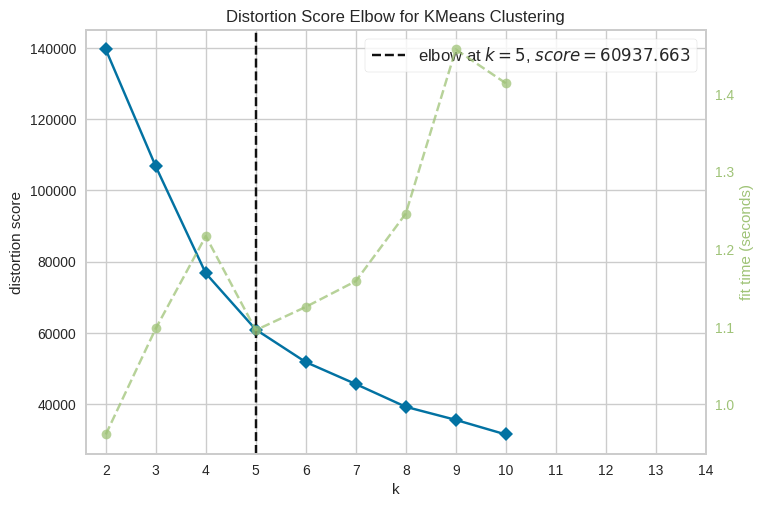

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
random_seed = 42
kmeans = KMeans(n_clusters=(2,12), n_init=10, random_state=random_seed)
kmeans_visualizer = Pipeline([
      ("kelbowvisualizer", KElbowVisualizer(KMeans()))])
kmeans_visualizer.fit(RFM_normalized)
plt.xticks(range(2,15))
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

A partir de cette simulation ittérative, on deduit que le nombre de K optimal est 5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

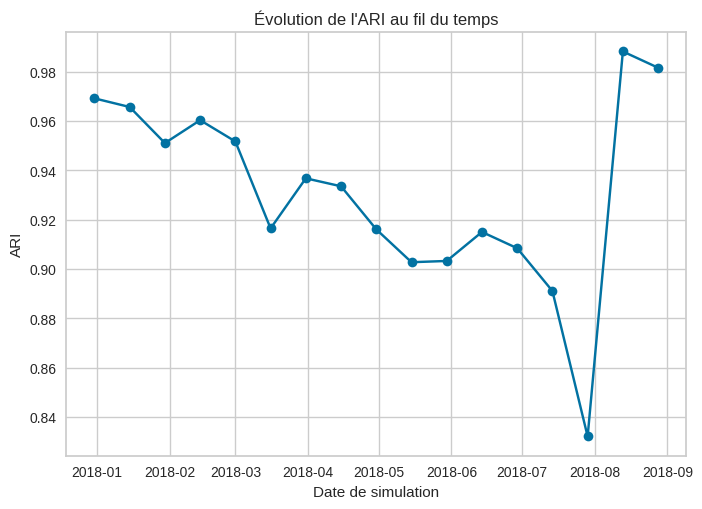

Mise à jour nécessaire à la date : 2018-08-28 00:00:00


In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Fonction pour générer le fichier clients Fi à une date Ti
def generer_fichier_clients(df, date):
    """
    Génère un fichier clients filtré par rapport à une date spécifique.

    Cette fonction prend un DataFrame contenant des données clients et une date en entrée,
    puis retourne une copie filtrée du DataFrame contenant uniquement les clients dont la date maximale
    est antérieure ou égale à la date spécifiée.

    Args:
        df (pandas.DataFrame): Le DataFrame contenant les données clients.
        date (str): La date de référence pour filtrer les clients au format 'YYYY-MM-DD'.

    Returns:
        pandas.DataFrame: Une copie du DataFrame contenant uniquement les clients dont la date maximale
        est antérieure ou égale à la date spécifiée.

    Exemple:
        >>> df_clients = ...  # Charger les données clients depuis un fichier ou une source de données
        >>> date_reference = '2023-12-31'
        >>> fichier_clients_filtre = generer_fichier_clients(df_clients, date_reference)
    """
    df_filtered = df[df['Date_max'] <= date].copy()
    return df_filtered


# Fonction pour simuler l'évolution de l'ARI au fil du temps
def simuler_evolution_ari(df, n_jours, num_clusters=5):
    """
    Cette fonction simule l'évolution de l'Index Rand Ajusté (ARI) au fil du temps en utilisant des modèles de clustering.

    Args:
        df (DataFrame): Le DataFrame contenant les données des clients, avec au moins les colonnes 'Date_max' et 'customer_id'.
        n_jours (int): Le nombre de jours à simuler.
        num_clusters (int, optional): Le nombre de clusters à utiliser pour le clustering. Par défaut, 5.

    Returns:
        None

    La fonction génère un graphique montrant l'évolution de l'ARI au fil du temps entre les clusters prédits par le modèle initial M0 et ceux prédits par des
    modèles Mi générés à différentes dates de simulation espacées de n_jours.La simulation s'arrête lorsque l'ARI est inférieur à 0.8 .
    Affiche un graphique montrant l'évolution de l'ARI au fil du temps et imprime la date à laquelle une mise à jour est nécessaire.
    Note:
    - La fonction utilise la méthode du KMeans pour la prédiction des clusters.
    - La fonction fait l'hypothèse que le DataFrame passé en argument contient
      des données pour chaque client jusqu'à une certaine date ('Date_max').
    - La fonction nécessite que les bibliothèques pandas, scikit-learn et matplotlib
      soient préalablement importées dans l'environnement Python.


    Exemple:
        >>> simuler_evolution_ari(dataframe, 30, 5)
    """
    debut_simulation = pd.to_datetime('2017-12-31')
    fin_fichier = df['Date_max'].max()

    ari_list = []
    date_list = []

    # Standardisation des données avec le StandardScaler du modèle M0
    scaler_M0 = StandardScaler().fit(df.drop(['customer_id', 'Date_max'], axis=1))
    features_scaled_M0 = scaler_M0.transform(df.drop(['customer_id', 'Date_max'], axis=1))
    model_M0 = KMeans(n_clusters=num_clusters).fit(features_scaled_M0)

    while debut_simulation <= fin_fichier:
        # Création du fichier clients Fi à la date Ti
        fichier_clients = generer_fichier_clients(df, debut_simulation)

        # Standardisation des données avec le StandardScaler du modèle Mi
        scaler_Mi = StandardScaler().fit(fichier_clients.drop(['customer_id', 'Date_max'], axis=1))
        features_scaled_Mi = scaler_Mi.transform(fichier_clients.drop(['customer_id', 'Date_max'], axis=1))

        # Prédiction avec le modèle initial M0
        predictions_M0 = model_M0.predict(features_scaled_Mi)

        # Prédiction avec le modèle Mi
        model_Mi = KMeans(n_clusters=num_clusters).fit(features_scaled_Mi)
        predictions_Mi = model_Mi.predict(features_scaled_Mi)

        # Calcul de l'ARI
        ari = adjusted_rand_score(predictions_M0, predictions_Mi)
        if ari<0.8:
          break;

        # Enregistrement des résultats
        ari_list.append(ari)
        date_list.append(debut_simulation)

        # Passage à la prochaine itération
        debut_simulation += pd.DateOffset(days=15)

    # Affichage de l'évolution de l'ARI
    plt.plot(date_list, ari_list, marker='o')
    plt.xlabel('Date de simulation')
    plt.ylabel('ARI')
    plt.title('Évolution de l\'ARI au fil du temps')
    plt.show()

    return print(f"Mise à jour nécessaire à la date : {date_list[-1]}")

n_jours_entre_simulations = 15

# Simulation de l'évolution de l'ARI
simuler_evolution_ari(RFM, n_jours_entre_simulations)


En intiant notre ittéreation au  01/01/2018, le modèle nécessite un réentrainement à la date du 29/08/20218. On peut donc dire que le délai de maintenance est d'environ 8 mois